In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sklearn
import math
import librosa
import librosa.display
import warnings
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, f1_score, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


In [2]:
matplotlib.rcParams.update({'font.size': 22})

In [3]:
dataset_path = "./dataset"
genres_path = os.path.join(dataset_path, 'genres_original')
genres = os.listdir(genres_path)

In [4]:
data = pd.read_csv(f'{dataset_path}/features_30_sec.csv')

In [5]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [6]:
data = data.drop(columns=['length', 'filename'])

In [7]:
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [8]:
y = data['label']
X = data.loc[:, data.columns != 'label']

In [9]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
 
X = pd.DataFrame(np_scaled, columns = cols)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    ax = pc.axes
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []

    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0}'.format(class_names[idx]) for idx, _  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)



[0.31, 0.25, 0.28]
[0.93, 1.0, 0.96]
[0.55, 0.67, 0.6]
[0.44, 0.38, 0.41]
[0.38, 0.33, 0.36]
[0.69, 0.5, 0.58]
[0.51, 0.84, 0.64]
[0.67, 0.62, 0.64]
[0.33, 0.26, 0.29]
[0.26, 0.24, 0.25]
plotMat: [[0.31, 0.25, 0.28], [0.93, 1.0, 0.96], [0.55, 0.67, 0.6], [0.44, 0.38, 0.41], [0.38, 0.33, 0.36], [0.69, 0.5, 0.58], [0.51, 0.84, 0.64], [0.67, 0.62, 0.64], [0.33, 0.26, 0.29], [0.26, 0.24, 0.25]]
support: [20, 13, 27, 21, 15, 22, 25, 13, 23, 21]
Accuracy 0.5


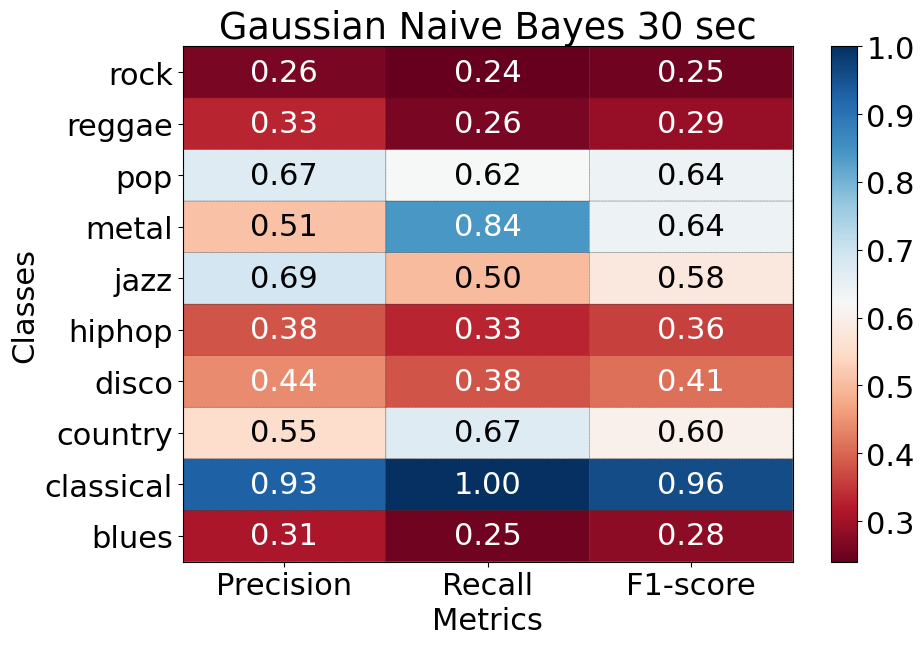

In [12]:
nb = GaussianNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="Gaussian Naive Bayes 30 sec")
print('Accuracy', round(accuracy_score(y_test, preds), 5))
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds))
# disp.plot()
# plt.show()

[0.7, 0.8, 0.74]
[1.0, 1.0, 1.0]
[0.71, 0.63, 0.67]
[0.52, 0.52, 0.52]
[0.5, 0.67, 0.57]
[0.91, 0.91, 0.91]
[0.7, 0.92, 0.79]
[0.69, 0.69, 0.69]
[0.56, 0.39, 0.46]
[0.53, 0.38, 0.44]
plotMat: [[0.7, 0.8, 0.74], [1.0, 1.0, 1.0], [0.71, 0.63, 0.67], [0.52, 0.52, 0.52], [0.5, 0.67, 0.57], [0.91, 0.91, 0.91], [0.7, 0.92, 0.79], [0.69, 0.69, 0.69], [0.56, 0.39, 0.46], [0.53, 0.38, 0.44]]
support: [20, 13, 27, 21, 15, 22, 25, 13, 23, 21]
Accuracy 0.68


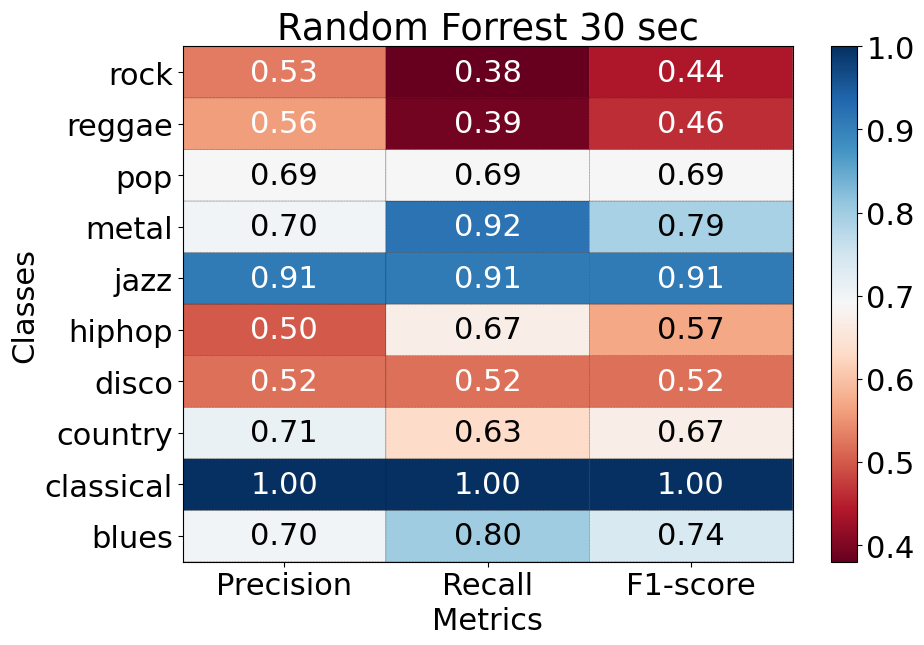

In [13]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X_train, y_train)
preds = rforest.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="Random Forrest 30 sec")
print('Accuracy', round(accuracy_score(y_test, preds), 5))

[0.69, 0.55, 0.61]
[0.75, 0.92, 0.83]
[0.56, 0.74, 0.63]
[0.44, 0.67, 0.53]
[0.57, 0.53, 0.55]
[0.79, 0.5, 0.61]
[0.81, 0.88, 0.85]
[0.64, 0.69, 0.67]
[0.53, 0.35, 0.42]
[0.31, 0.24, 0.27]
plotMat: [[0.69, 0.55, 0.61], [0.75, 0.92, 0.83], [0.56, 0.74, 0.63], [0.44, 0.67, 0.53], [0.57, 0.53, 0.55], [0.79, 0.5, 0.61], [0.81, 0.88, 0.85], [0.64, 0.69, 0.67], [0.53, 0.35, 0.42], [0.31, 0.24, 0.27]]
support: [20, 13, 27, 21, 15, 22, 25, 13, 23, 21]
Accuracy 0.6


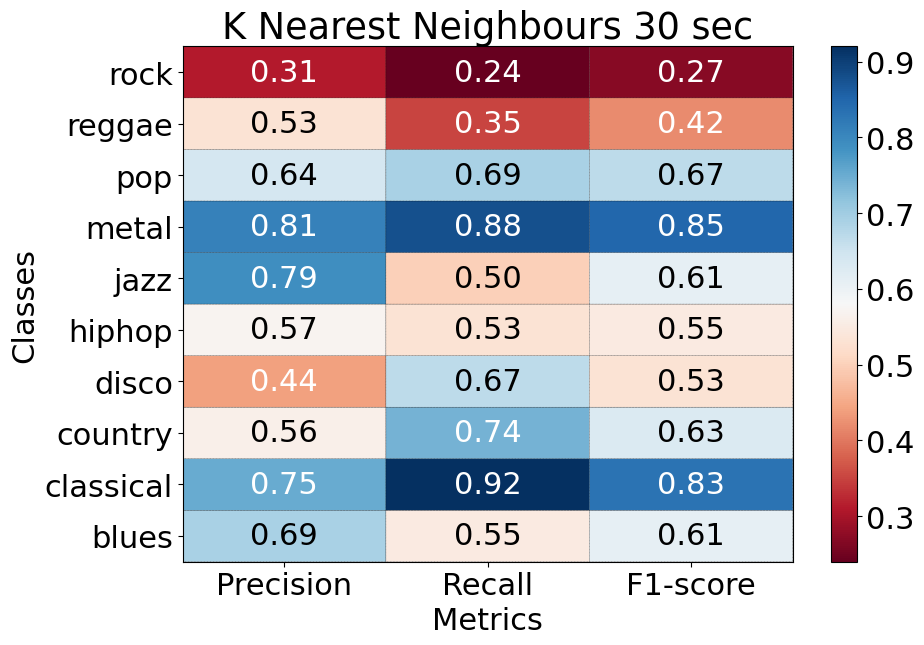

In [14]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="K Nearest Neighbours 30 sec")
print('Accuracy', round(accuracy_score(y_test, preds), 5))

[0.45, 0.45, 0.45]
[1.0, 0.92, 0.96]
[0.76, 0.59, 0.67]
[0.5, 0.62, 0.55]
[0.56, 0.6, 0.58]
[0.76, 0.86, 0.81]
[0.7, 0.92, 0.79]
[0.89, 0.62, 0.73]
[0.5, 0.39, 0.44]
[0.3, 0.29, 0.29]
plotMat: [[0.45, 0.45, 0.45], [1.0, 0.92, 0.96], [0.76, 0.59, 0.67], [0.5, 0.62, 0.55], [0.56, 0.6, 0.58], [0.76, 0.86, 0.81], [0.7, 0.92, 0.79], [0.89, 0.62, 0.73], [0.5, 0.39, 0.44], [0.3, 0.29, 0.29]]
support: [20, 13, 27, 21, 15, 22, 25, 13, 23, 21]
Accuracy 0.62


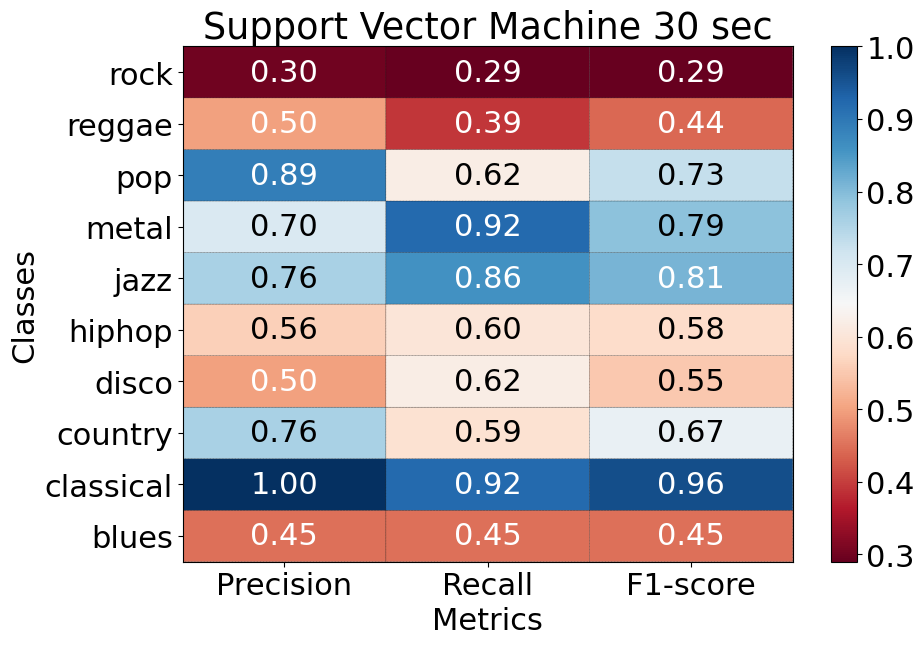

In [15]:
svm = SVC(decision_function_shape="ovo")
svm.fit(X_train, y_train)
preds = svm.predict(X_test)
plot_classification_report(classification_report(y_test, preds), title="Support Vector Machine 30 sec")
print('Accuracy', round(accuracy_score(y_test, preds), 5))

In [16]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

[0.68, 0.75, 0.71]
[1.0, 1.0, 1.0]
[0.76, 0.7, 0.73]
[0.71, 0.57, 0.63]
[0.62, 0.87, 0.72]
[1.0, 0.95, 0.98]
[0.85, 0.92, 0.88]
[0.79, 0.85, 0.81]
[0.58, 0.48, 0.52]
[0.52, 0.52, 0.52]
plotMat: [[0.68, 0.75, 0.71], [1.0, 1.0, 1.0], [0.76, 0.7, 0.73], [0.71, 0.57, 0.63], [0.62, 0.87, 0.72], [1.0, 0.95, 0.98], [0.85, 0.92, 0.88], [0.79, 0.85, 0.81], [0.58, 0.48, 0.52], [0.52, 0.52, 0.52]]
support: [20, 13, 27, 21, 15, 22, 25, 13, 23, 21]
Accuracy 0.745


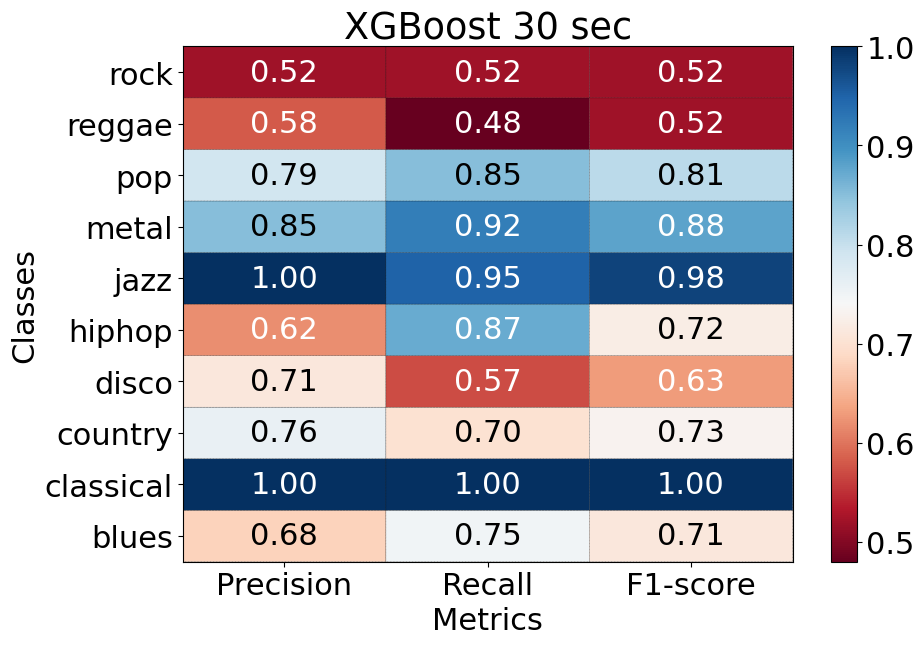

In [17]:
plot_classification_report(classification_report(y_test, preds), title="XGBoost 30 sec")
print('Accuracy', round(accuracy_score(y_test, preds), 5))